# Jupyter IPython notebook Capable of Rendering Buffers (rasters) Used/Produced by `test_flate_png.py` tests

(requires matplotlib)

After running any of these tests (`pytest -k test_flate_png_alt_file`), two files are produced: `./result.pickle` and `./expected.pickle`.

These files contain buffers that can be rendered. Both rendered buffers must be identical


## Boiler plate

In [1]:
import matplotlib.pyplot as pyplot
import array
import ast

def pixel(bytes, color_type):
    if color_type == 0:
        assert len(bytes) == 1, "expected 1 but got %d" % len(bytes)
        #print bytes
        bytes = [bytes[0]/255.0, bytes[0]/255.0, bytes[0]/255.0]
        
    elif color_type == 2:
        assert len(bytes) == 3, "expected 3 but got %d" % len(bytes)
        #print bytes
        bytes = [bytes[0]/255.0, bytes[1]/255.0, bytes[2]/255.0]
        
    elif color_type == 'rgb':
        assert len(bytes) == 3, "expected 3 but got %d" % len(bytes)
        bytes = [(int)(bytes[0] * 255) % 256, (int)(bytes[1] * 255.0) % 256, (int)(bytes[2] * 255.0) % 256]
        
    else:
        raise ValueError("Unsupported color_type %d" % color_type)
    return bytes

In [2]:
def rasterizer(data, rowbytes, bytes_per_pixel, color_type, filter_included=False):
    raster = []
    
    first_pixel = 0
    if filter_included:
        rowbytes += 1
        first_pixel = 1
        
    for r in xrange(0, len(data), rowbytes):
        row = data[r : r + rowbytes]
        #print "row", row, len(row)
        raster_row = []

        for c in xrange(first_pixel, rowbytes, bytes_per_pixel):
            #print c, bytes_per_pixel, row[c : c + bytes_per_pixel]
            p = pixel(row[c : c + bytes_per_pixel], color_type)
            #print p
            raster_row.append(p)

        raster.append(raster_row)
    return raster

In [3]:
def load_png_log(png_log):
    '''
    Lifted from test_flate_png.py :: util_test_flate_png_alt_from_png_log_file
    
    Reads xxxxx.png.log and produces a raster of both expected and data
    '''
    with open(png_log) as f:
        
        data = array.array('B')
        expected = array.array('B')
        width = 0 
        bit_depth = 0 
        channels = 0 
        color_type = 0 
        pixel_depth = 0 
        rowbytes = 0 
        filter = 0 
        nrows = 0 

        for l in f.readlines():

            if l.startswith("PASS:"):
                break

            l = l.split(' = ')
            var = l[0]
            val = l[1]

            if var == 'width':
                width = int(val)

            elif var == 'bit_depth':
                bit_depth = int(val)

            elif var == 'channels':
                channels = int(val)

            elif var == 'color_type':
               color_type = int(val)

            elif var == 'pixel_depth':
                pixel_depth = int(val)

            elif var == 'rowbytes':
                rowbytes = int(val)

            elif var == 'filter':
                filter = int(val)

            elif var == 'data':
                d = ast.literal_eval(val)
                data.append(filter)
                data.extend(d)

            elif var == 'expected':
                e = ast.literal_eval(val)
                expected.extend(e)
                nrows += 1

        print("width: %d" % width)
        print("bit_depth: %d" % bit_depth)
        print("channels: %d" % channels)
        print("color_type: %d" % color_type)
        print("pixel_depth: %d" % pixel_depth)
        print("rowbytes: %d" % rowbytes)
        print("filter: %d" % filter)
        print("expected: %d" % len(expected))
        print("data: %d" % len(data))
        print("nrows: %d" % nrows)

        assert color_type in [
                    0, # Grayscale (Y)
                    2, # Truecolor (RGB)
                    # 3 Indexed is not supported (Palette)
                    4, # Grayscale with alpha (YA)
                    6, # Truecolor with alpha (RGBA)
                ]
        assert filter in [0, 1, 2, 3, 4]
        assert channels * bit_depth == pixel_depth
        assert (pixel_depth // 8) * width == rowbytes
        bytes_per_pixel = pixel_depth // 8
        assert 0 == pixel_depth % 8 # can't support pixels with bit_depth < 8
        assert 8 == bit_depth # ideally, we should test bit_depth 16 also
        assert nrows * (1 + width * bytes_per_pixel) == len(data) # 1 filter byte preceeding each row
        assert nrows * width * bytes_per_pixel == len(expected)

        ### Rasterize each buffer
        raster = rasterizer(expected, rowbytes, bytes_per_pixel, color_type)
        raster2 = rasterizer(data, rowbytes, bytes_per_pixel, color_type, filter_included=True)
        
    return (raster, raster2), (data, expected), (width, bit_depth, channels, color_type, pixel_depth, rowbytes, filter)

## Visualizations of pre-canned xxx.png.log files

width: 32
bit_depth: 8
channels: 3
color_type: 2
pixel_depth: 24
rowbytes: 96
filter: 1
expected: 3072
data: 3104
nrows: 32


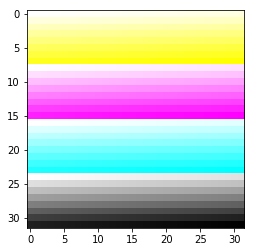

In [4]:
(raster, raster2), (data, expected), (width, bit_depth, channels, color_type, pixel_depth, rowbytes, filter) \
    = load_png_log('./basn2c08.png.log')
    
pyplot.imshow(raster)
pyplot.show()

width: 32
bit_depth: 8
channels: 1
color_type: 0
pixel_depth: 8
rowbytes: 32
filter: 1
expected: 1024
data: 1056
nrows: 32


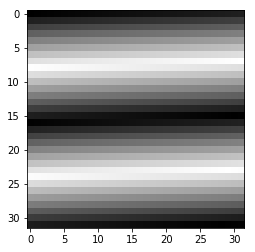

In [5]:
(raster, raster2), (data, expected), (width, bit_depth, channels, color_type, pixel_depth, rowbytes, filter) \
    = load_png_log('./basn0g08.png.log')

pyplot.imshow(raster)
pyplot.show()

width: 32
bit_depth: 8
channels: 3
color_type: 2
pixel_depth: 24
rowbytes: 96
filter: 1
expected: 3072
data: 3104
nrows: 32


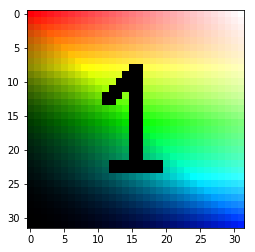

In [6]:
(raster, raster2), (data, expected), (width, bit_depth, channels, color_type, pixel_depth, rowbytes, filter) \
    = load_png_log('./f01n2c08.png.log')

pyplot.imshow(raster)
pyplot.show()

width: 32
bit_depth: 8
channels: 3
color_type: 2
pixel_depth: 24
rowbytes: 96
filter: 2
expected: 3072
data: 3104
nrows: 32


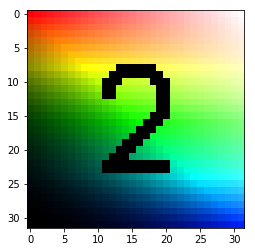

In [7]:
(raster, raster2), (data, expected), (width, bit_depth, channels, color_type, pixel_depth, rowbytes, filter) \
    = load_png_log('./f02n2c08.png.log')

pyplot.imshow(raster)
pyplot.show()

width: 32
bit_depth: 8
channels: 3
color_type: 2
pixel_depth: 24
rowbytes: 96
filter: 3
expected: 3072
data: 3104
nrows: 32


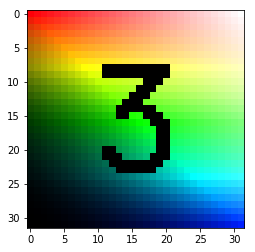

In [8]:
(raster, raster2), (data, expected), (width, bit_depth, channels, color_type, pixel_depth, rowbytes, filter) \
    = load_png_log('./f03n2c08.png.log')

pyplot.imshow(raster)
pyplot.show()

width: 32
bit_depth: 8
channels: 3
color_type: 2
pixel_depth: 24
rowbytes: 96
filter: 4
expected: 3072
data: 3104
nrows: 32


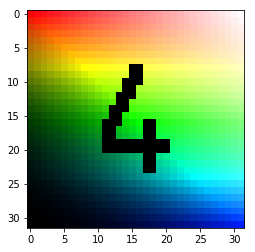

In [9]:
(raster, raster2), (data, expected), (width, bit_depth, channels, color_type, pixel_depth, rowbytes, filter) \
    = load_png_log('./f04n2c08.png.log')

pyplot.imshow(raster)
pyplot.show()

## Utility code to visually compare the `result` produced by test-case and its `expected` output

32
32
32
32


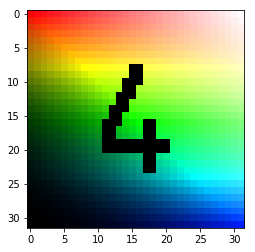

3072
32
32


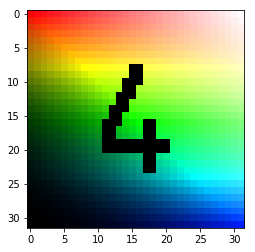

In [10]:
#
# After running any of these tests (pytest -k test_flate_png_alt_file),
#   two files are produced: tests/result.pickle and tests/expected.pickle.
#   These files contain buffers that can be rendered
#   Both rendered buffers must be identical

import pickle
with open('./result.pickle', 'rb') as f:
    result = pickle.load(f)

print len(raster)
print len(raster[0])
    
res = rasterizer(result, 96, 3, 2)
    
print len(res)
print len(res[0])

pyplot.imshow(res)
pyplot.show()

with open('./expected.pickle', 'rb') as f:
    expected = pickle.load(f)

print len(expected)
    
res = rasterizer(expected, 96, 3, 2)
    
print len(res)
print len(res[0])

pyplot.imshow(res)
pyplot.show()